In [ ]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
df=pd.read_csv("DATASET.csv")

In [ ]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

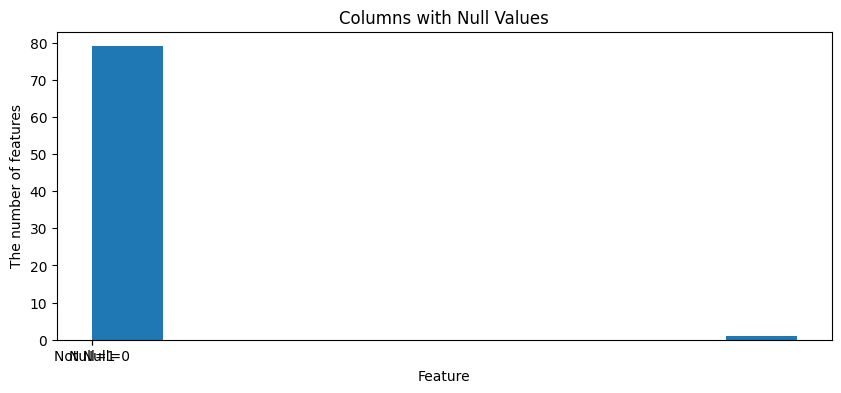

In [ ]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0,1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()


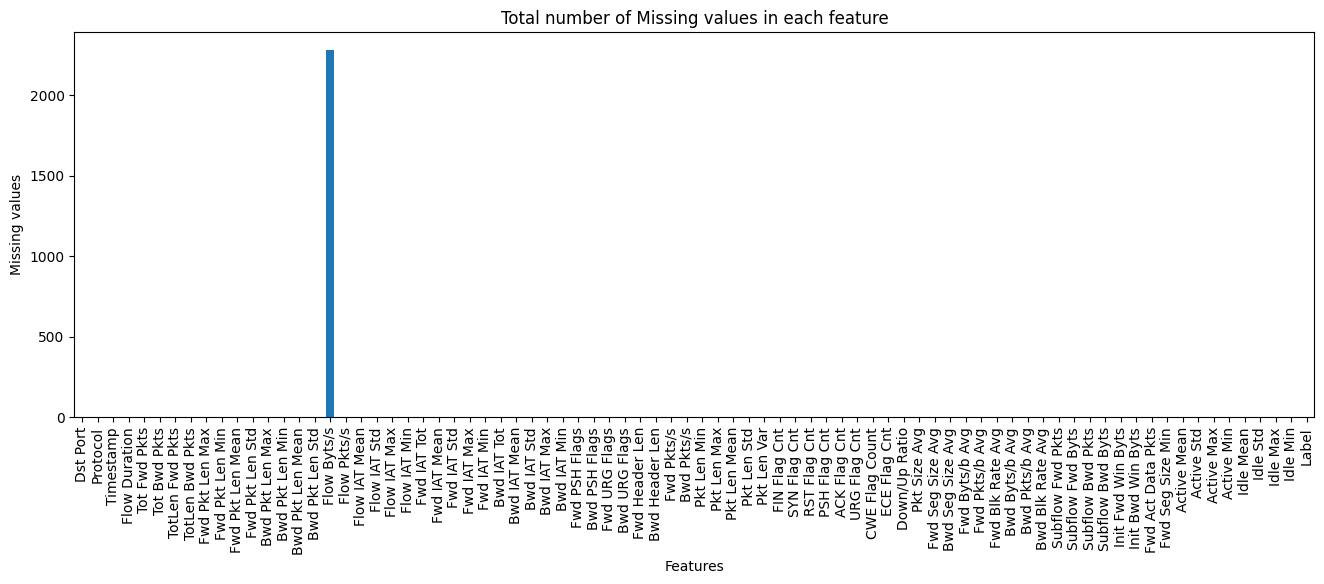

In [ ]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)


In [ ]:
## Removing the null values
data_f=df.dropna()

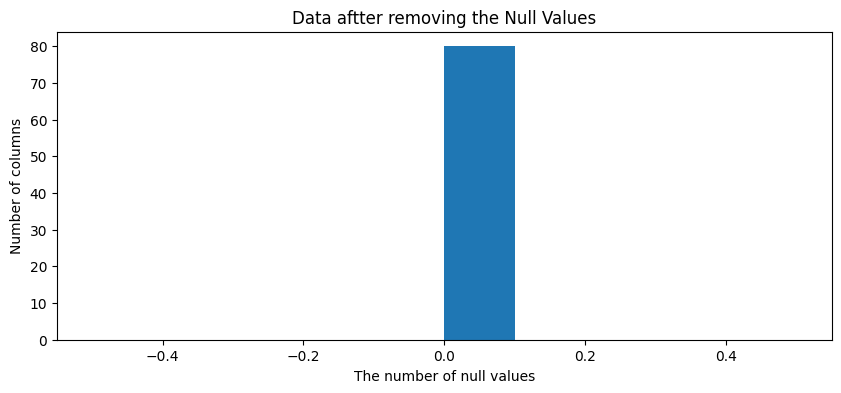

In [ ]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

In [ ]:
# To know the data types of the columns

(data_f.dtypes=='object')

,0
Dst Port,False
Protocol,False
Timestamp,True
Flow Duration,False
Tot Fwd Pkts,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [ ]:
data_f=data_f.drop(['Timestamp'],axis=1)

In [ ]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'Benign': 0, 'FTP-BruteForce': 1, 'SSH-Bruteforce': 1})

In [ ]:
data_f.head(20)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,0
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,0
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,0
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
5,22,6,6989341,16,12,1239,2273,744,0,77.437500,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
6,0,0,112640480,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320240.0,203.646753,56320384,56320096,0
7,0,0,112641244,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320622.0,62.225397,56320666,56320578,0
8,80,6,476513,5,3,211,463,211,0,42.200000,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
9,80,6,475048,5,3,220,472,220,0,44.000000,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,0


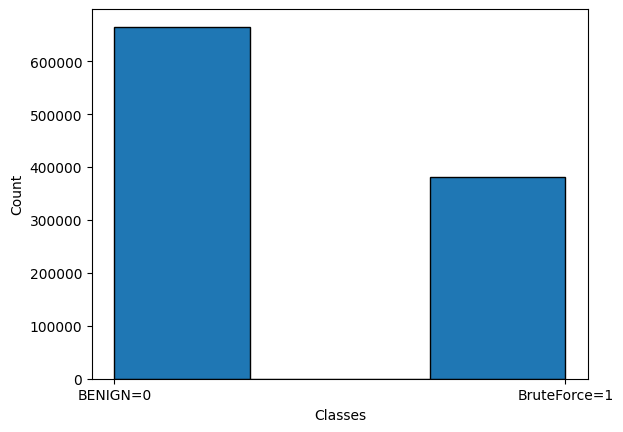

In [ ]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'BruteForce=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


In [ ]:
data_f.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,...,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06,1.046298e+06
mean,4.776915e+03,8.112144e+00,6.269168e+06,6.215780e+00,7.226879e+00,4.489686e+02,4.531644e+03,1.749535e+02,8.407793e+00,3.888022e+01,...,2.328673e+01,5.163662e+04,2.140800e+04,8.808285e+04,4.004173e+04,3.107955e+06,7.313098e+05,4.822864e+06,2.131548e+06,3.640865e-01
std,1.430012e+04,4.464391e+00,1.261662e+09,4.452645e+01,1.049817e+02,1.575251e+04,1.516667e+05,2.878687e+02,1.950004e+01,5.334605e+01,...,1.107275e+01,5.821861e+05,2.188760e+05,7.403654e+05,5.608755e+05,5.420668e+08,3.824185e+08,1.523772e+09,1.818962e+07,4.811733e-01
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.300000e+01,6.000000e+00,1.033000e+03,2.000000e+00,1.000000e+00,3.600000e+01,5.500000e+01,3.400000e+01,0.000000e+00,2.566667e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,6.000000e+00,4.079898e+05,7.000000e+00,6.000000e+00,4.550000e+02,7.880000e+02,2.000000e+02,0.000000e+00,5.600000e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553300e+04,1.700000e+01,1.200000e+08,5.115000e+03,9.198000e+03,8.591554e+06,1.339773e+07,6.444000e+04,1.460000e+03,1.121703e+04,...,4.800000e+01,1.102401e+08,5.723446e+07,1.102401e+08,1.102401e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10,1.000000e+00


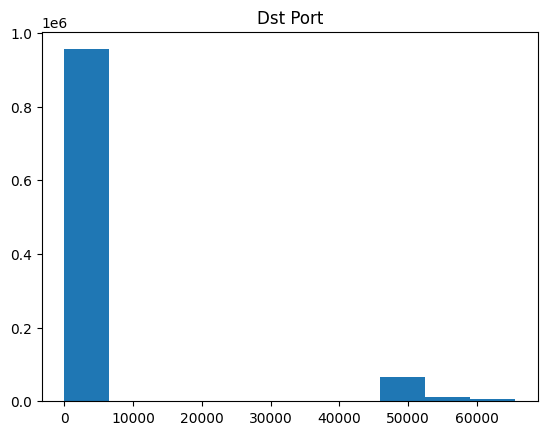

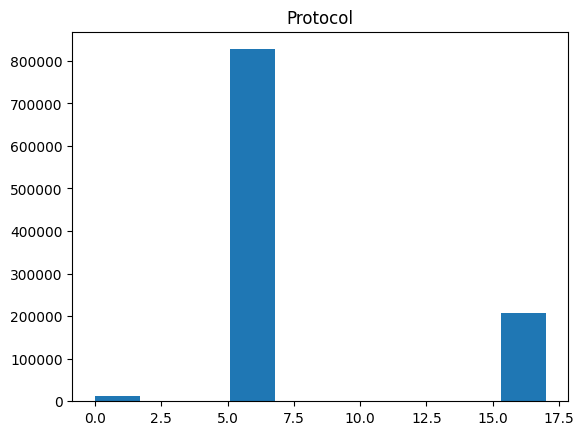

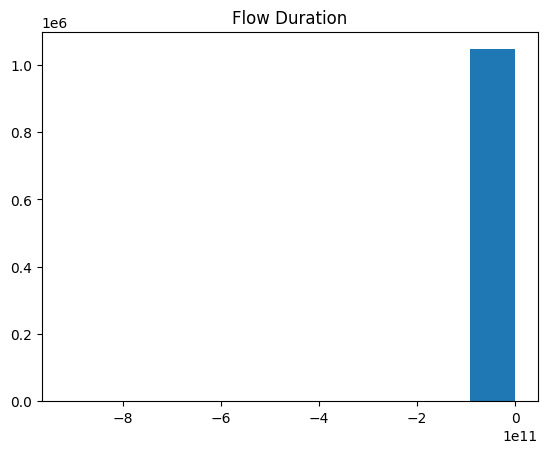

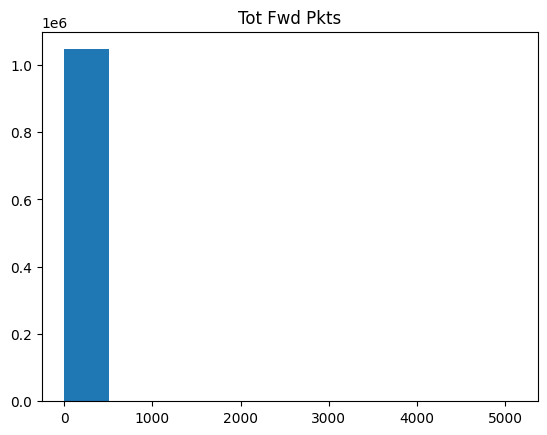

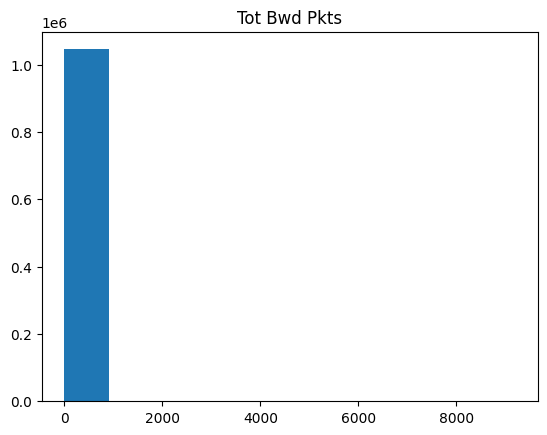

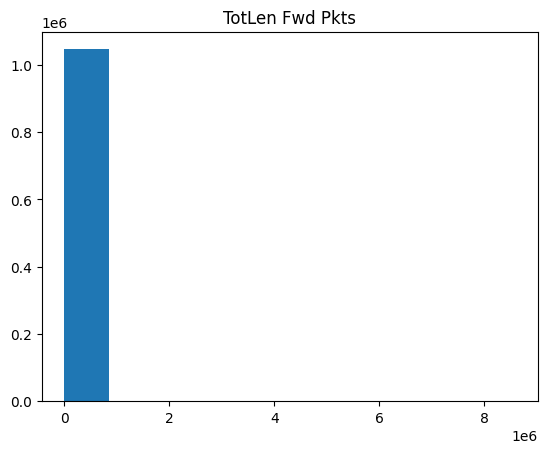

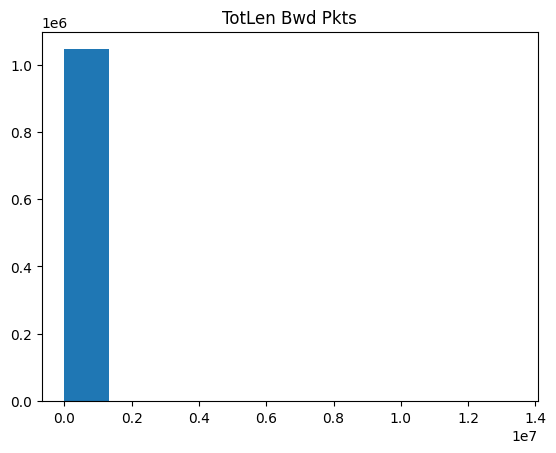

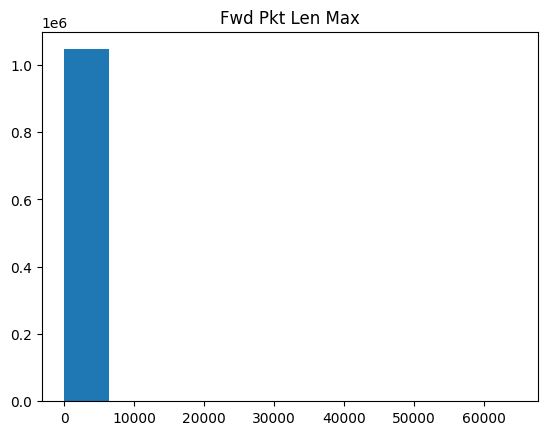

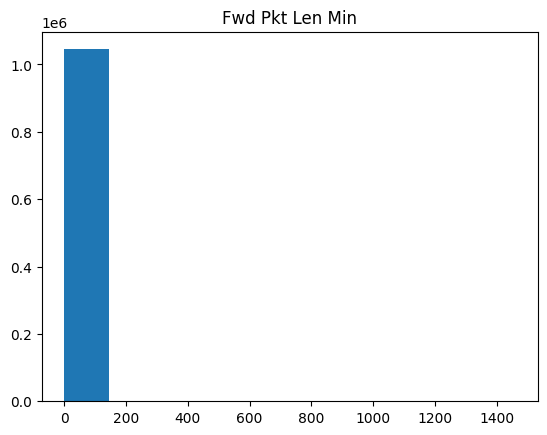

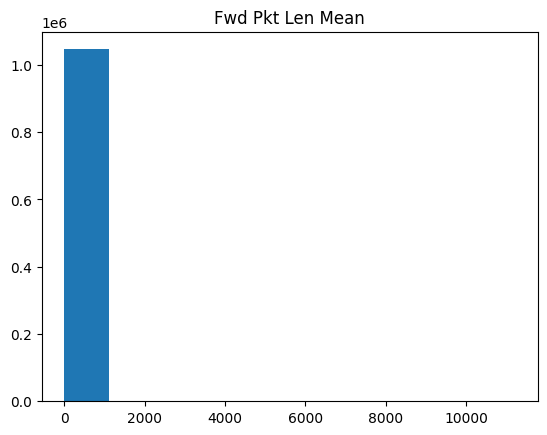

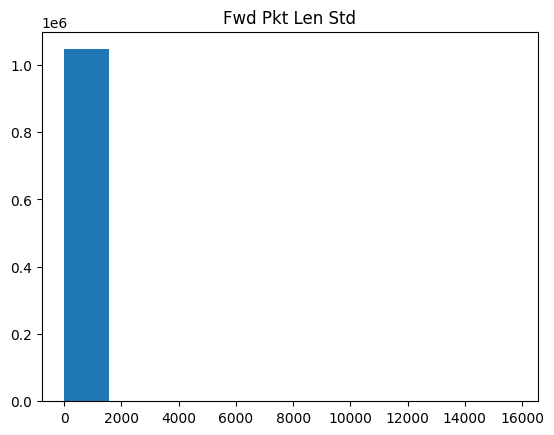

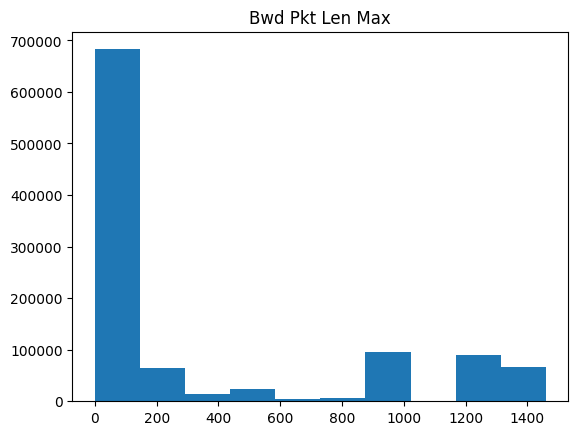

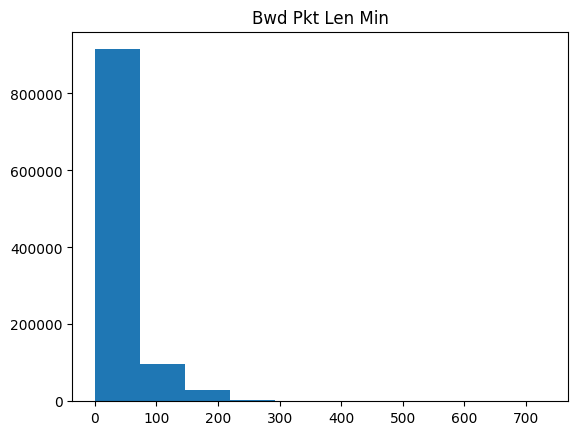

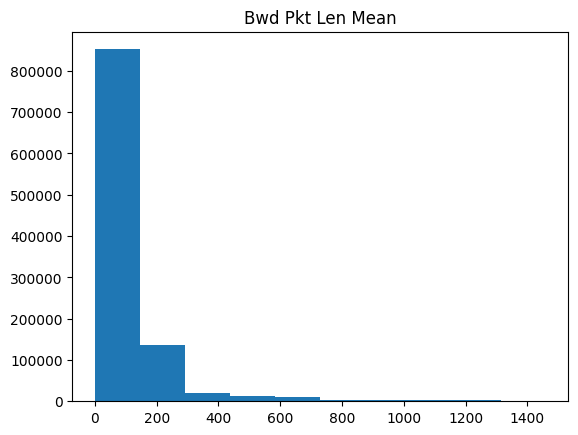

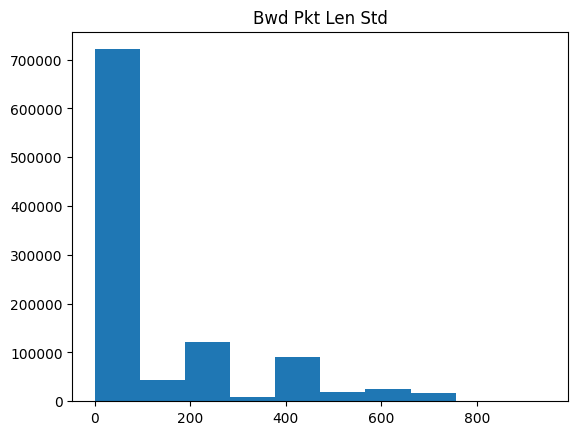

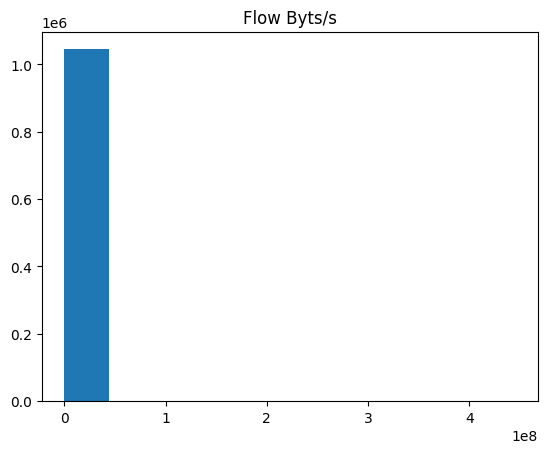

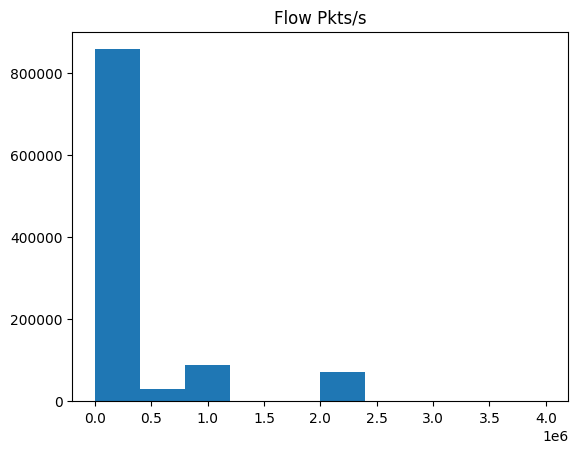

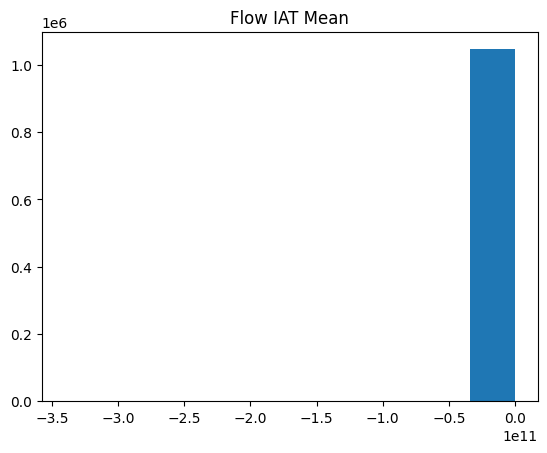

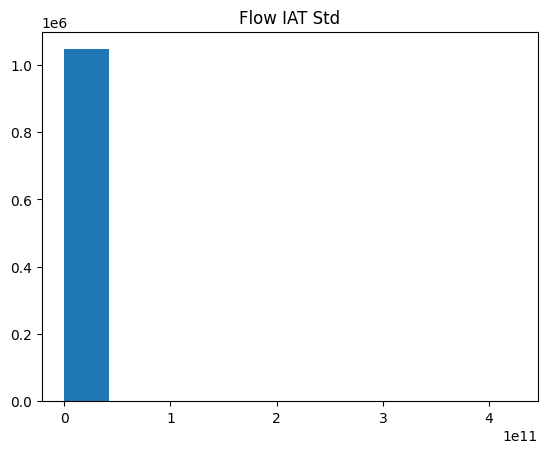

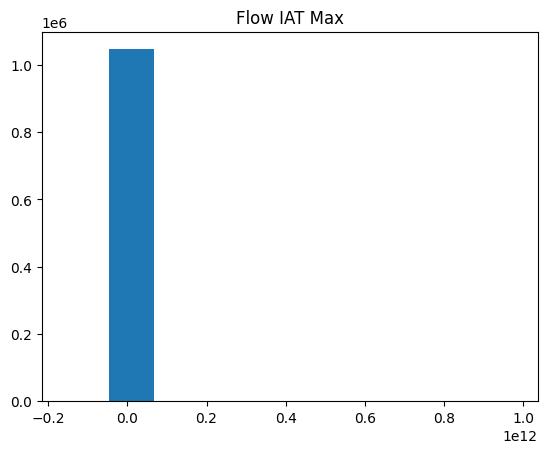

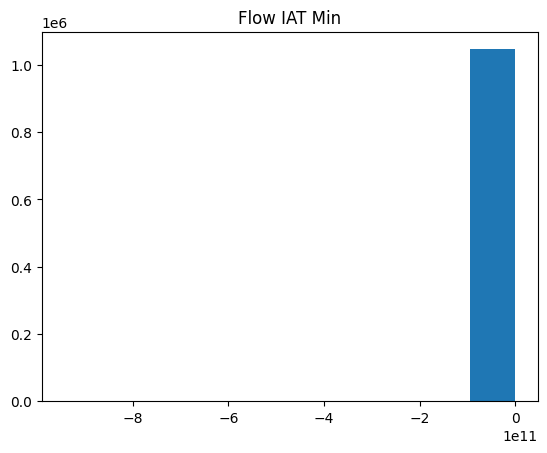

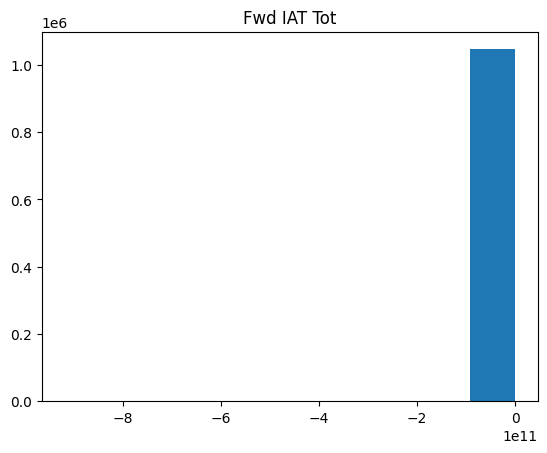

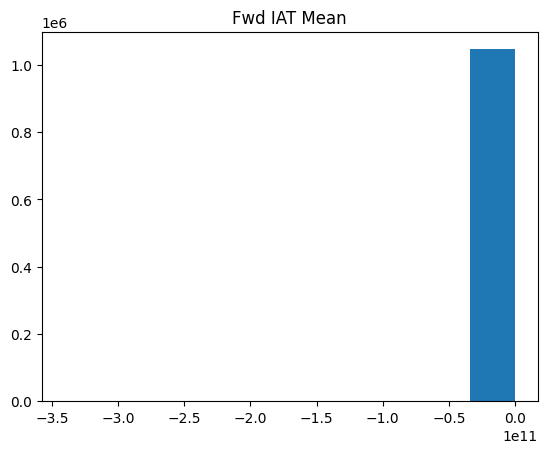

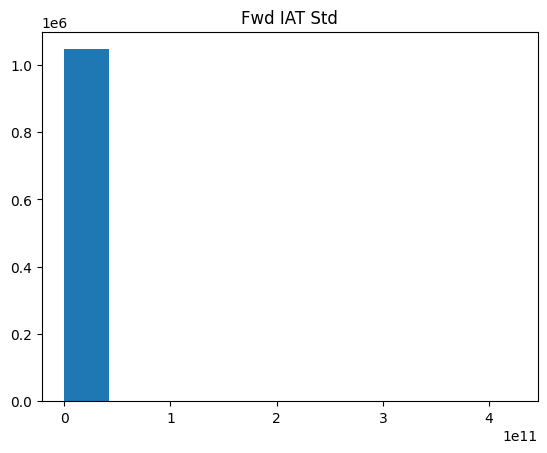

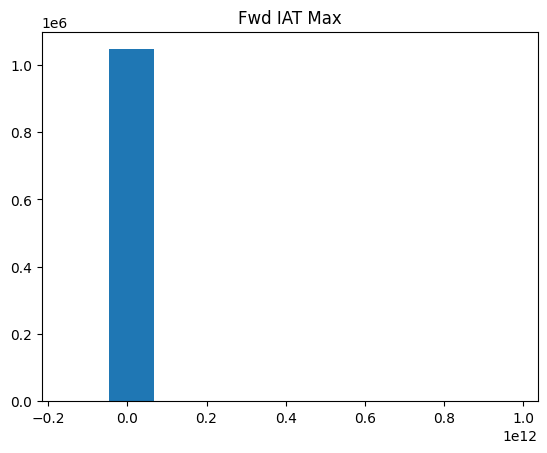

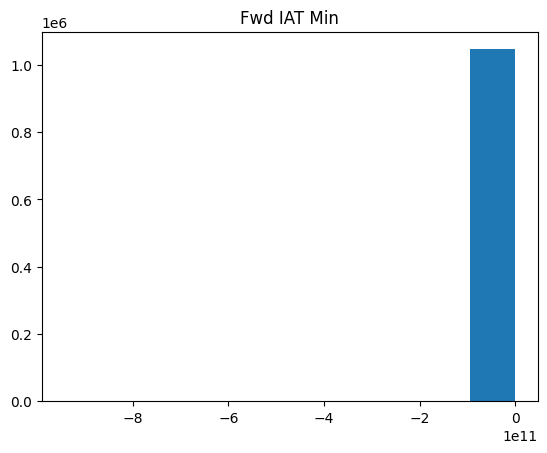

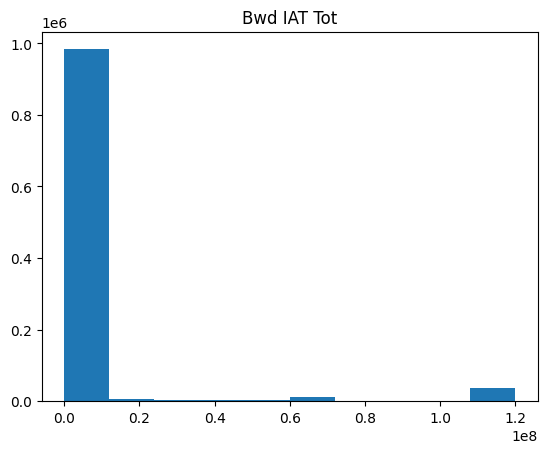

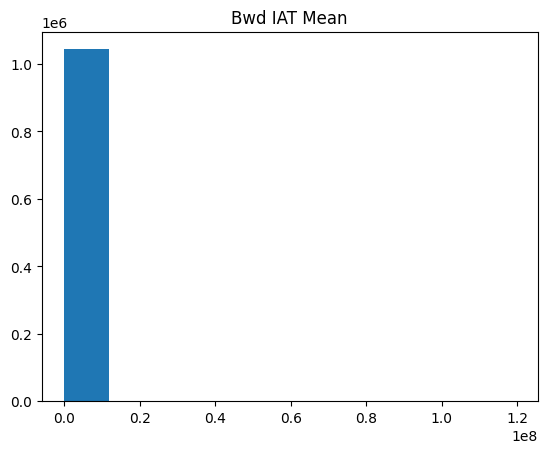

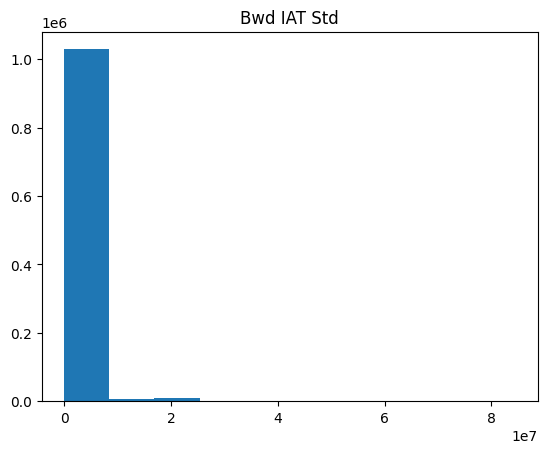

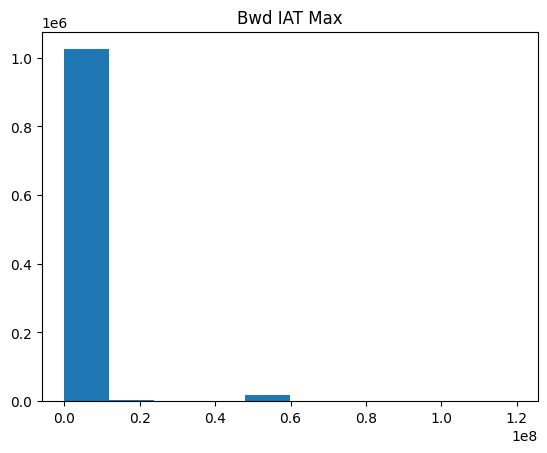

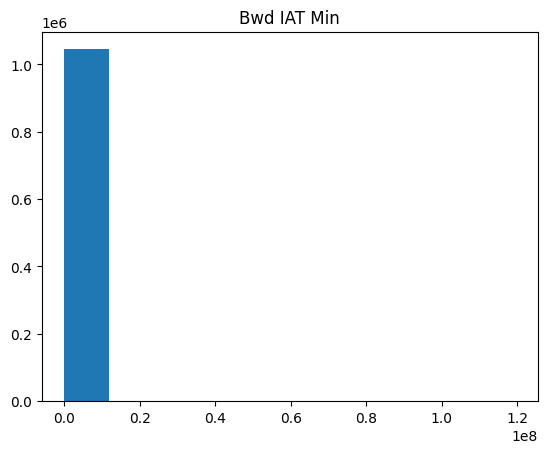

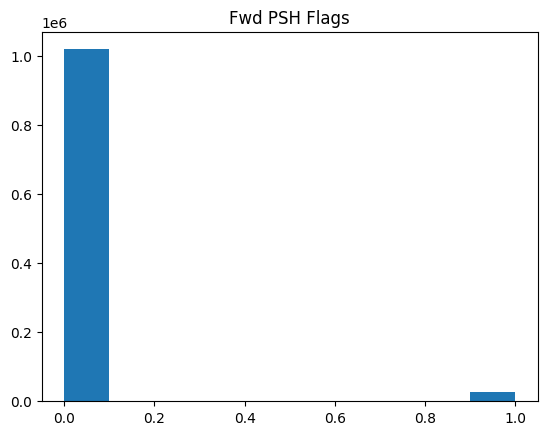

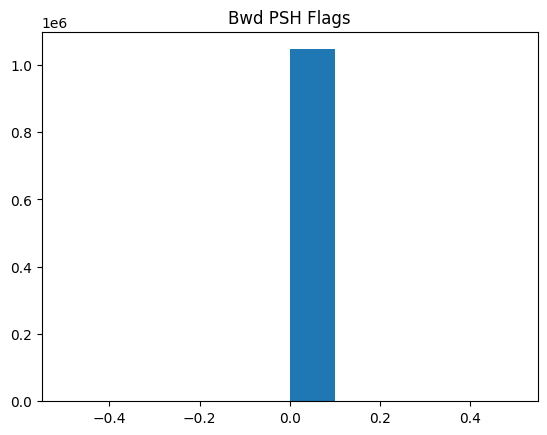

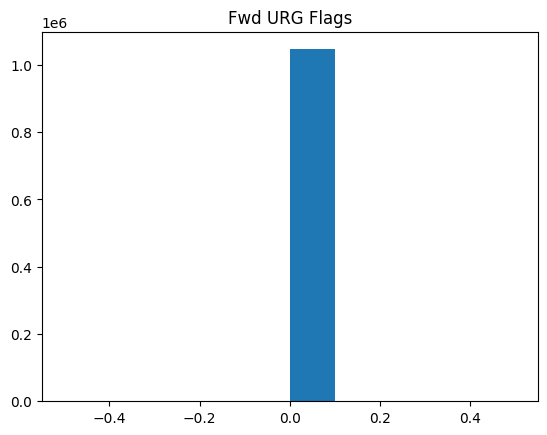

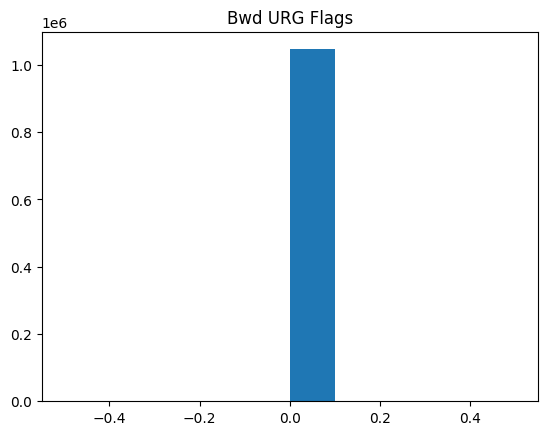

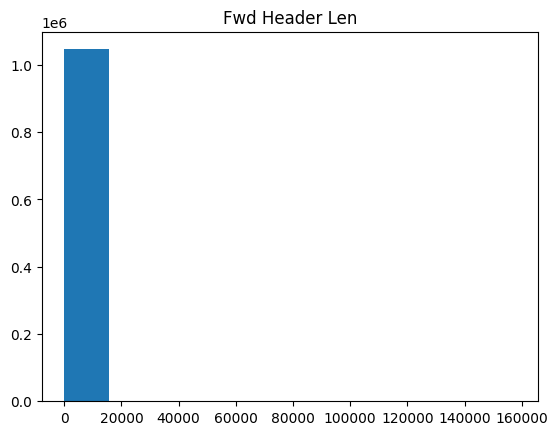

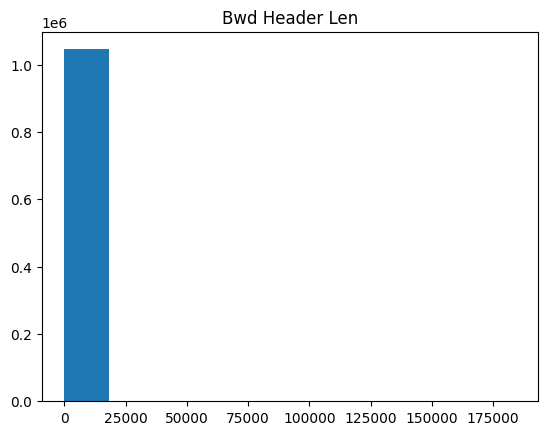

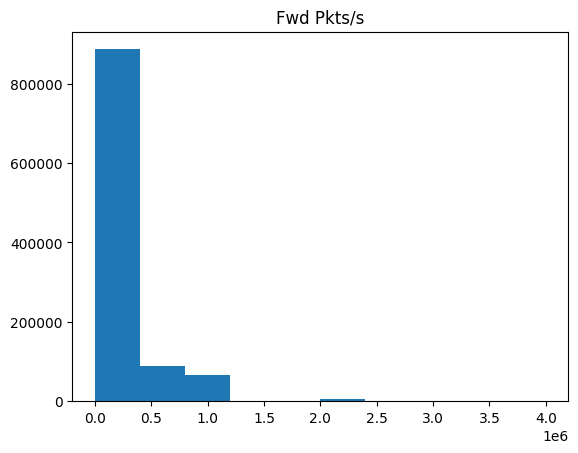

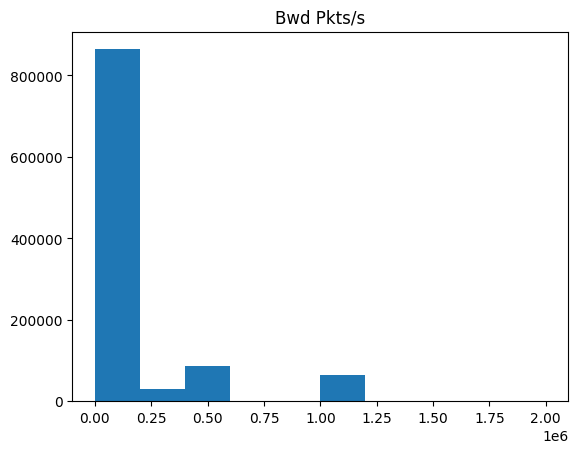

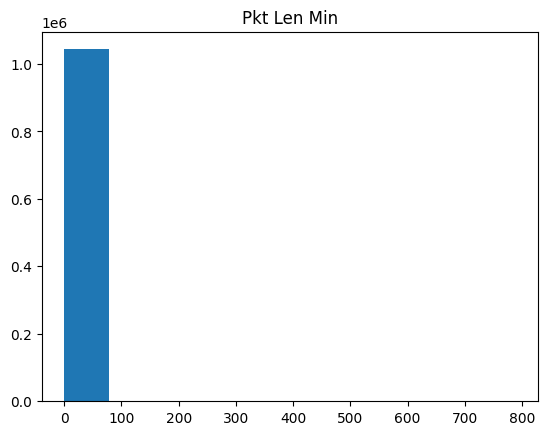

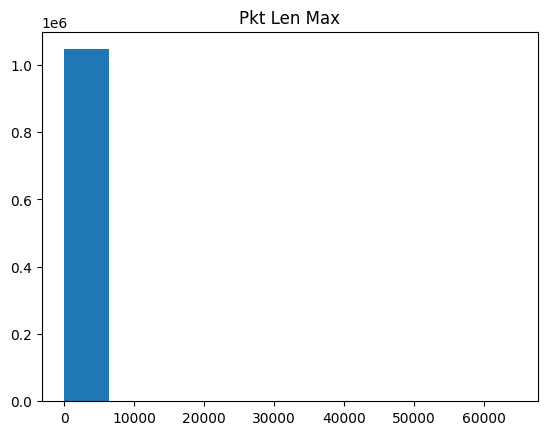

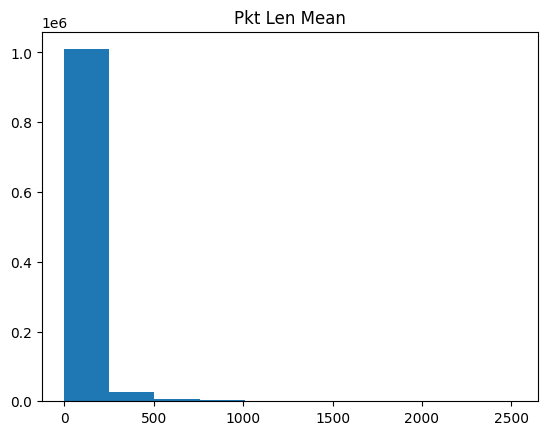

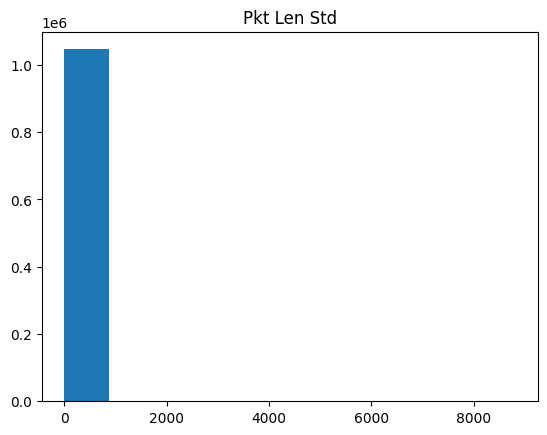

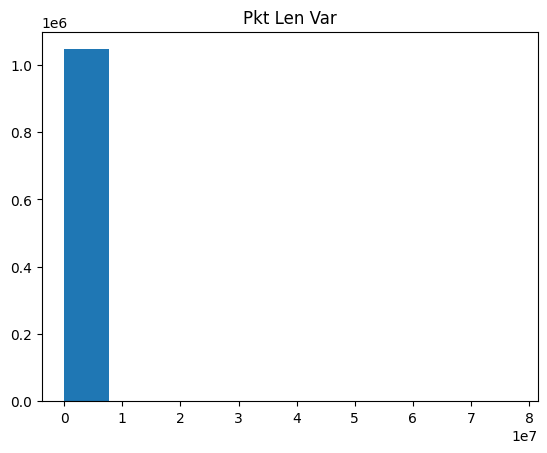

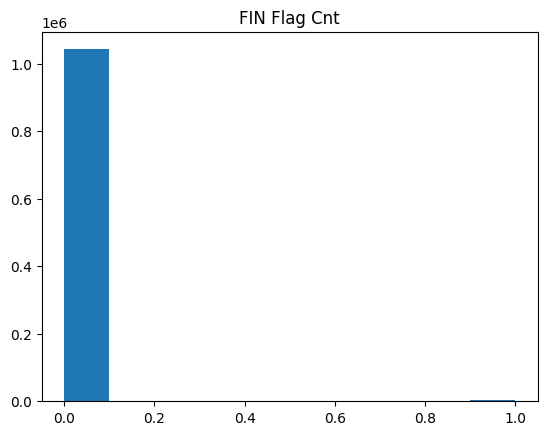

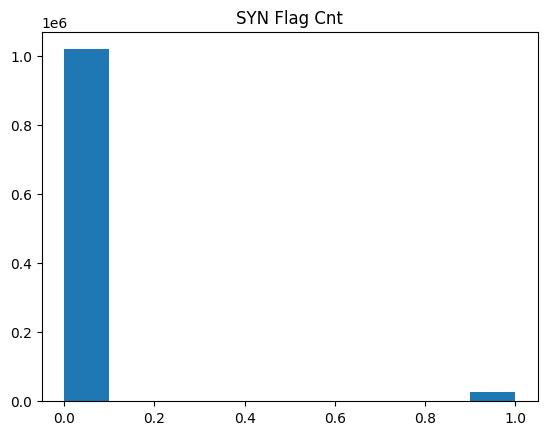

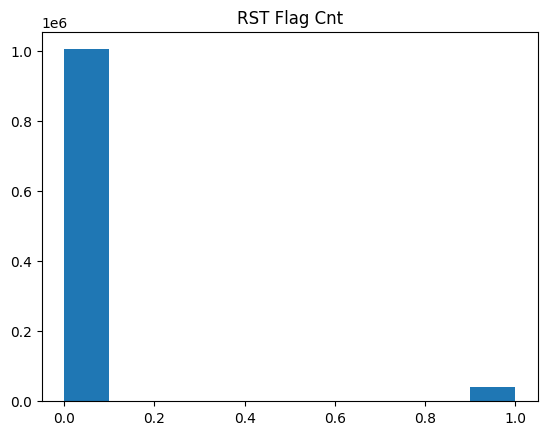

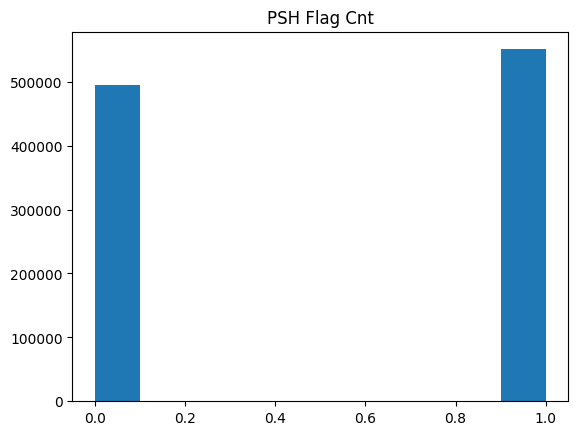

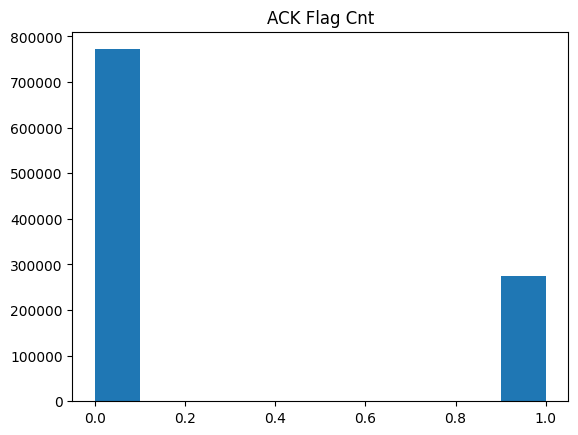

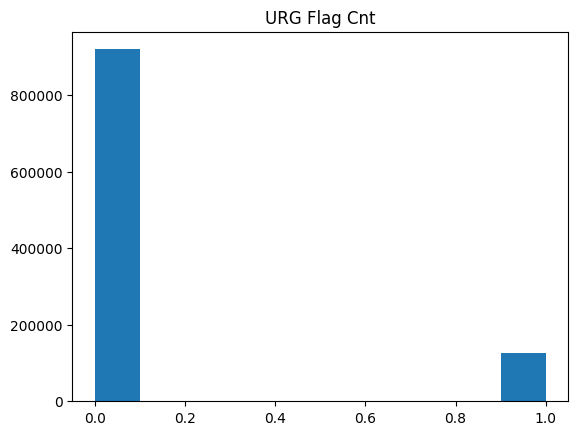

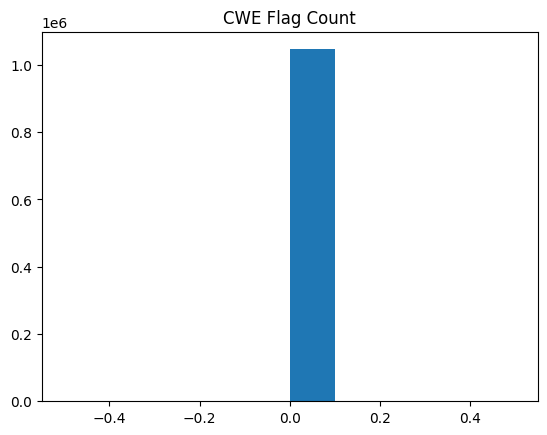

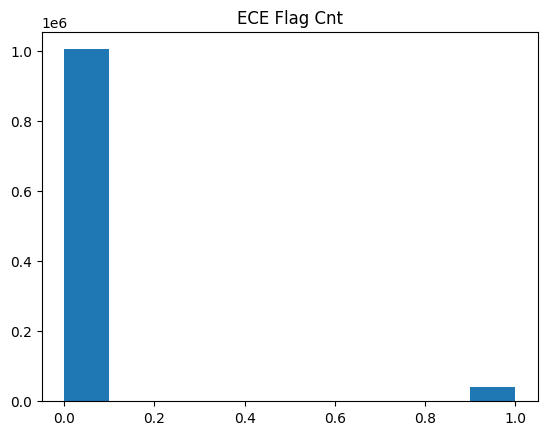

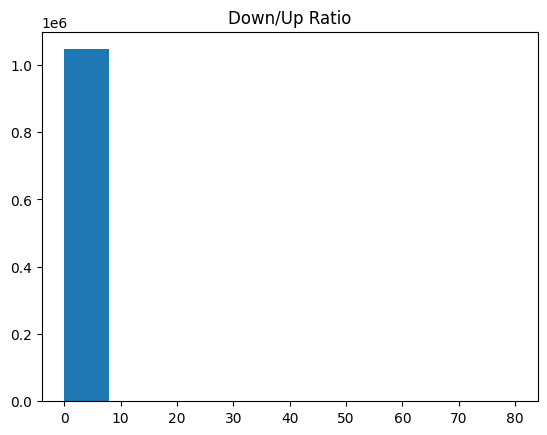

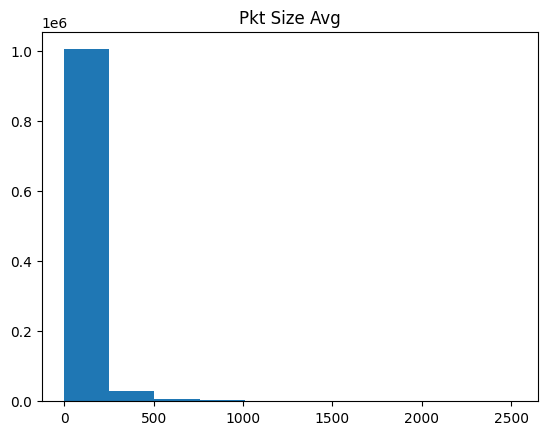

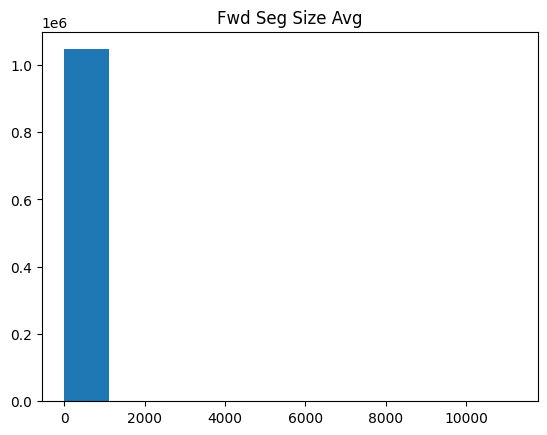

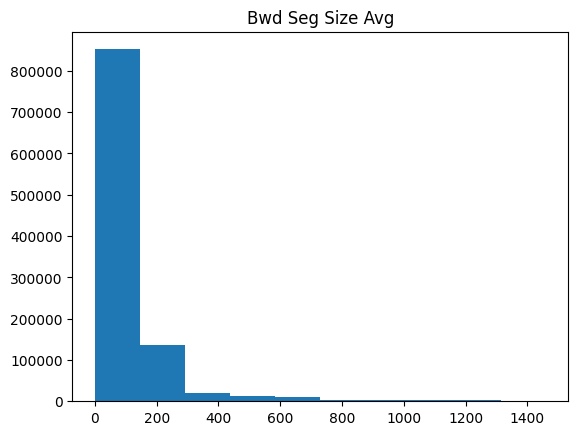

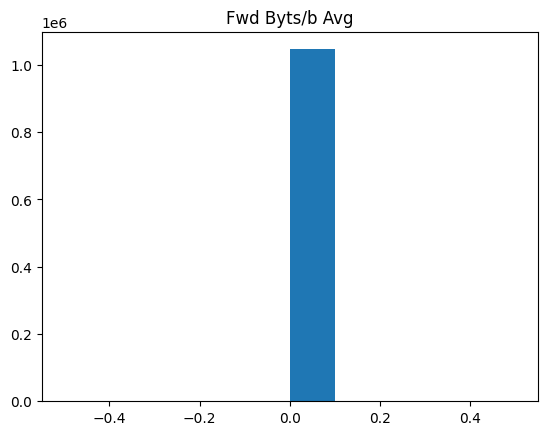

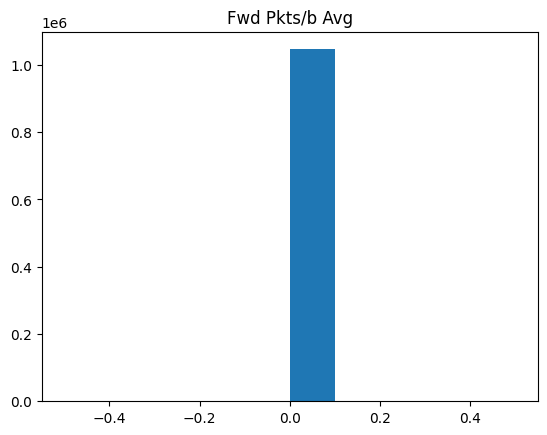

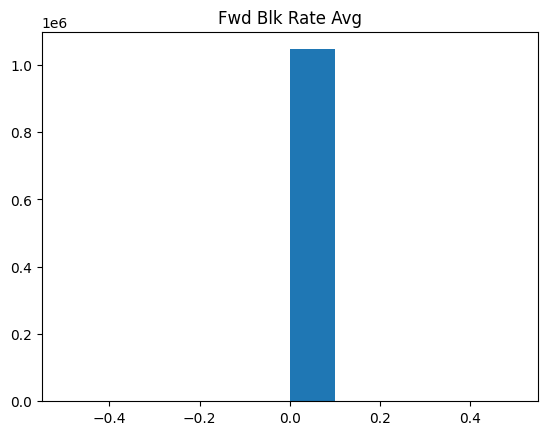

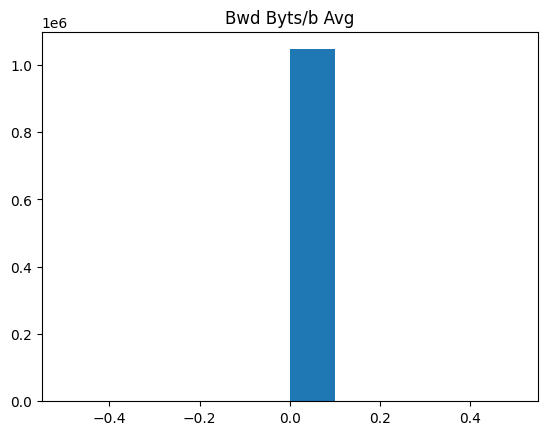

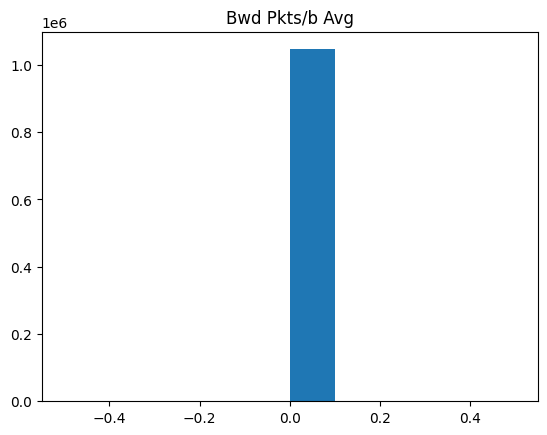

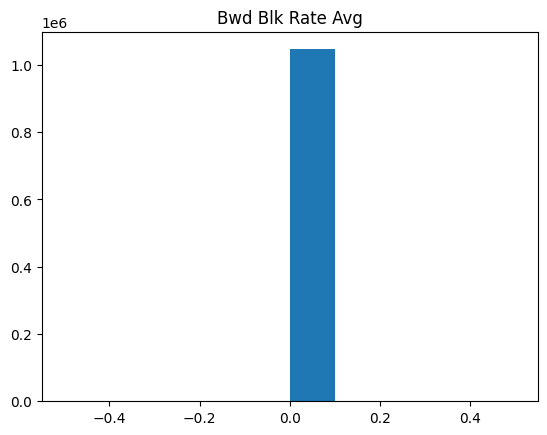

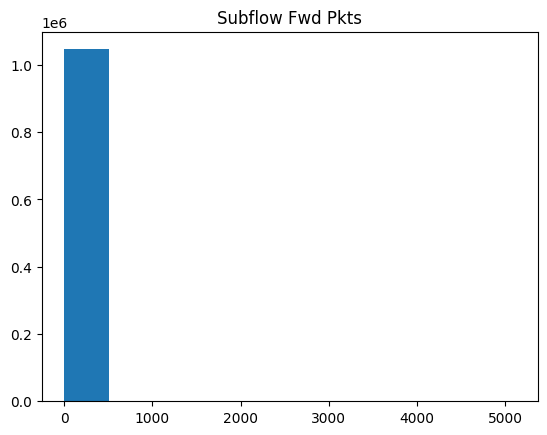

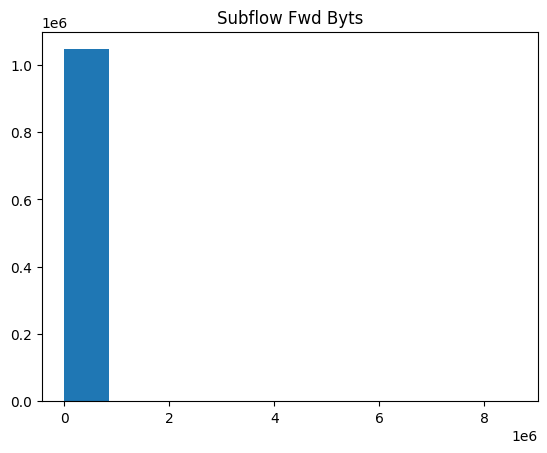

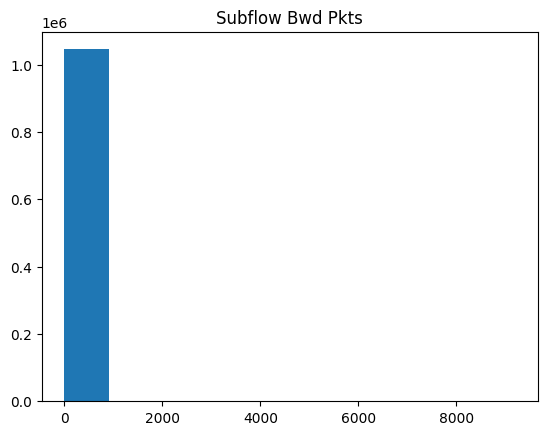

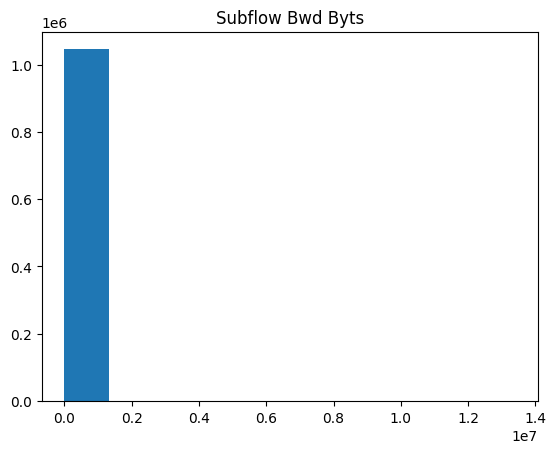

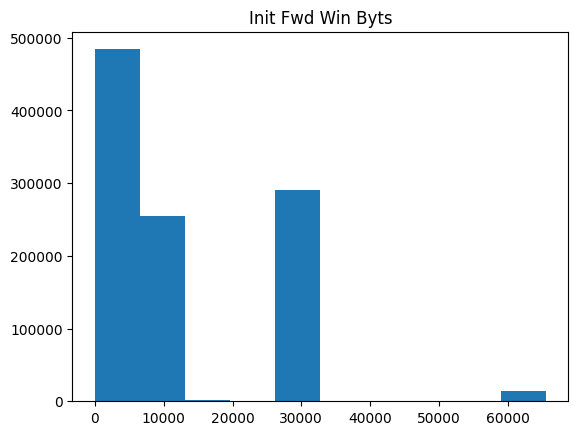

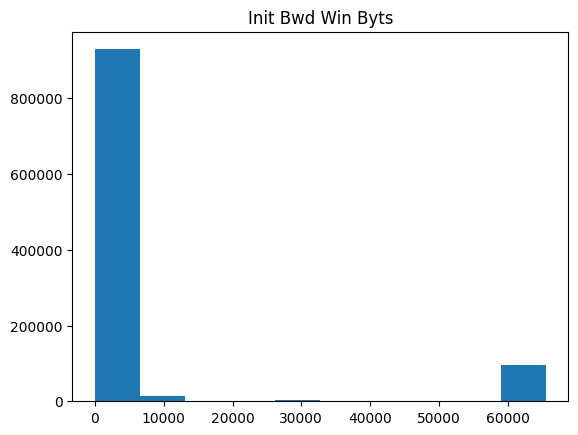

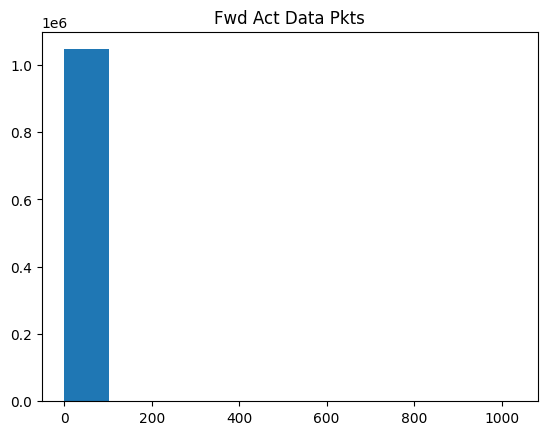

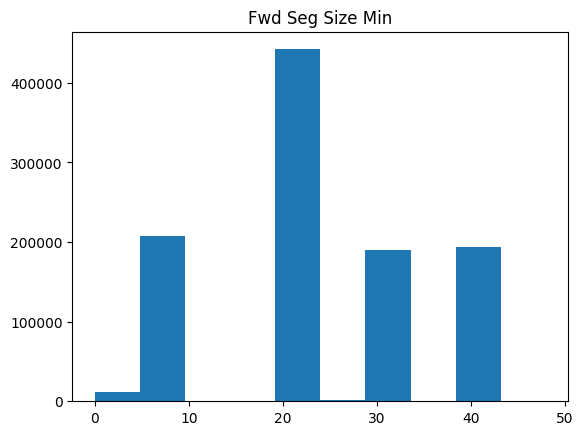

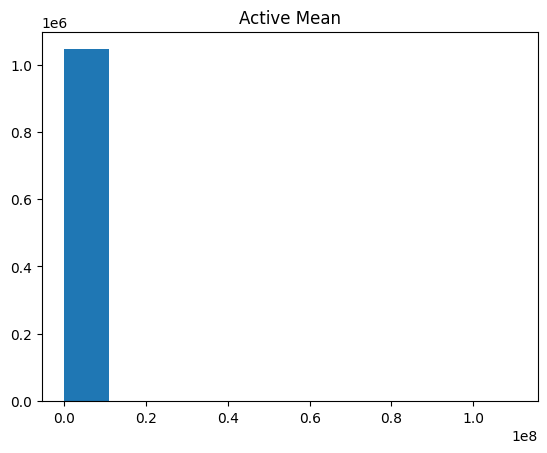

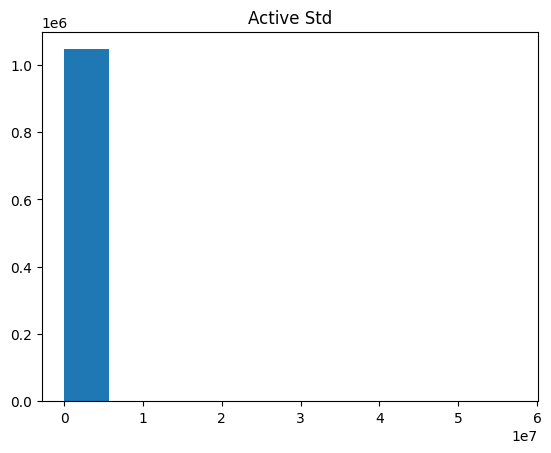

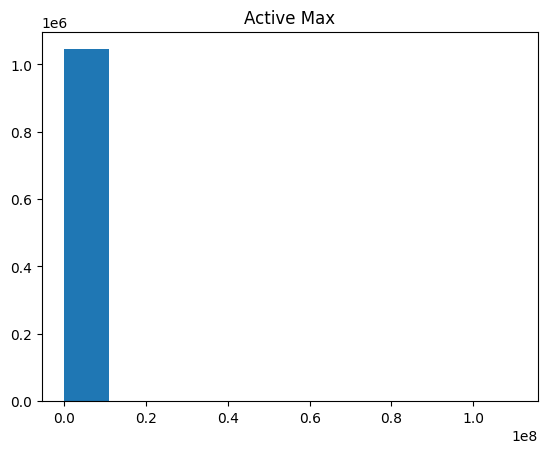

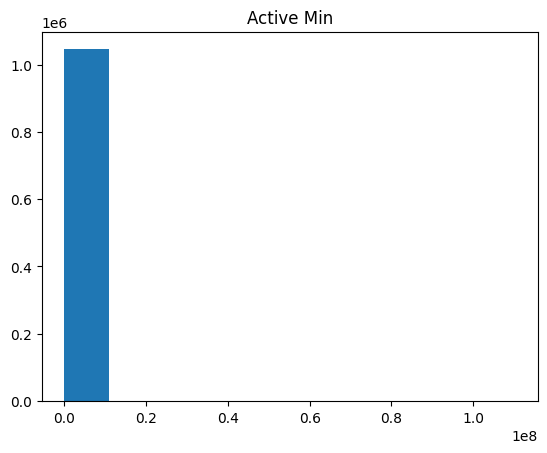

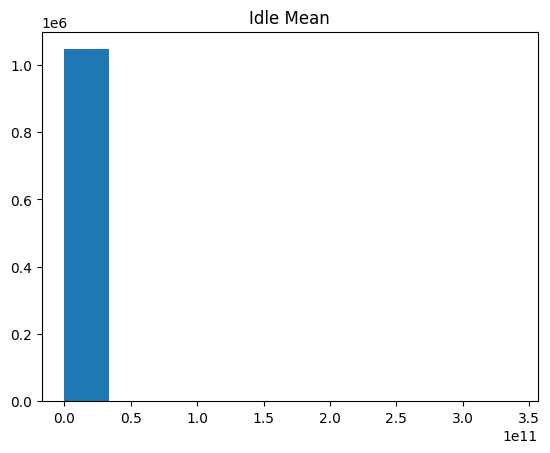

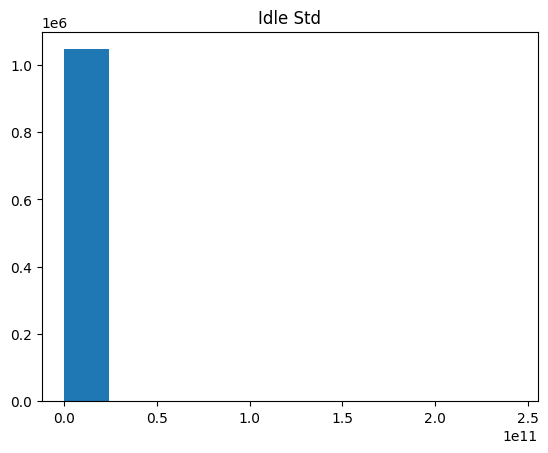

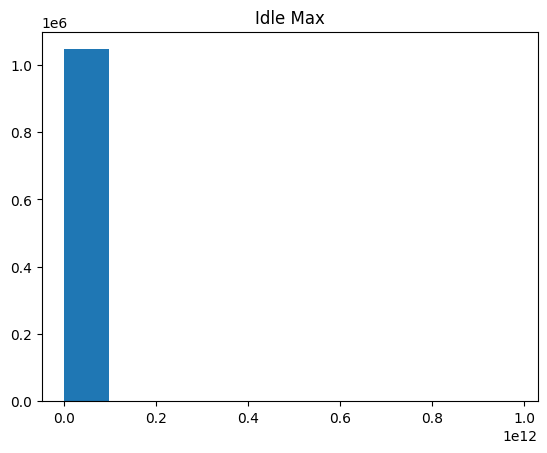

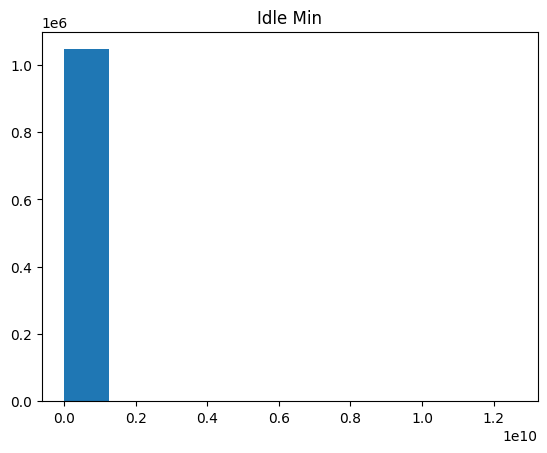

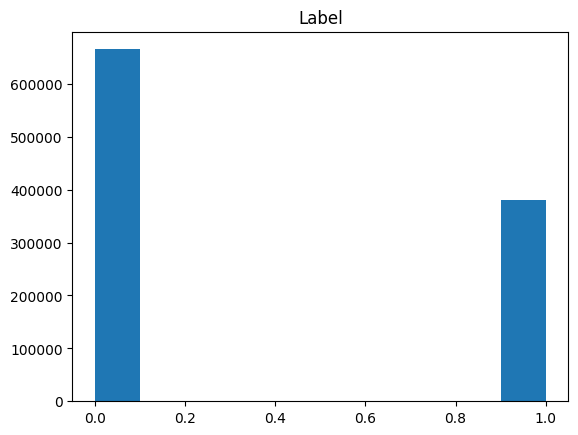

In [ ]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    # Replace infinite and NaN values with the column's median
    data_f[col] = data_f[col].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
    data_f[col] = data_f[col].fillna(data_f[col].median()) # Replace NaN with median

    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

In [ ]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (732408, 78)
The test dataset size =  (313890, 78)


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

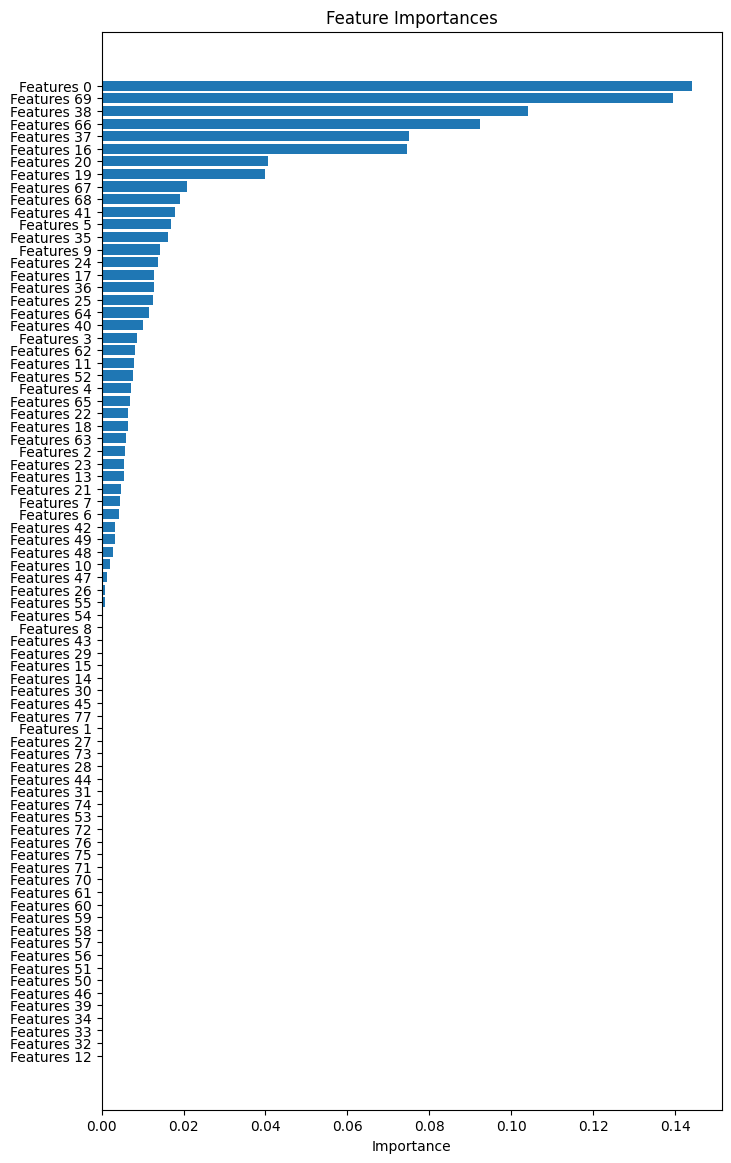

In [ ]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

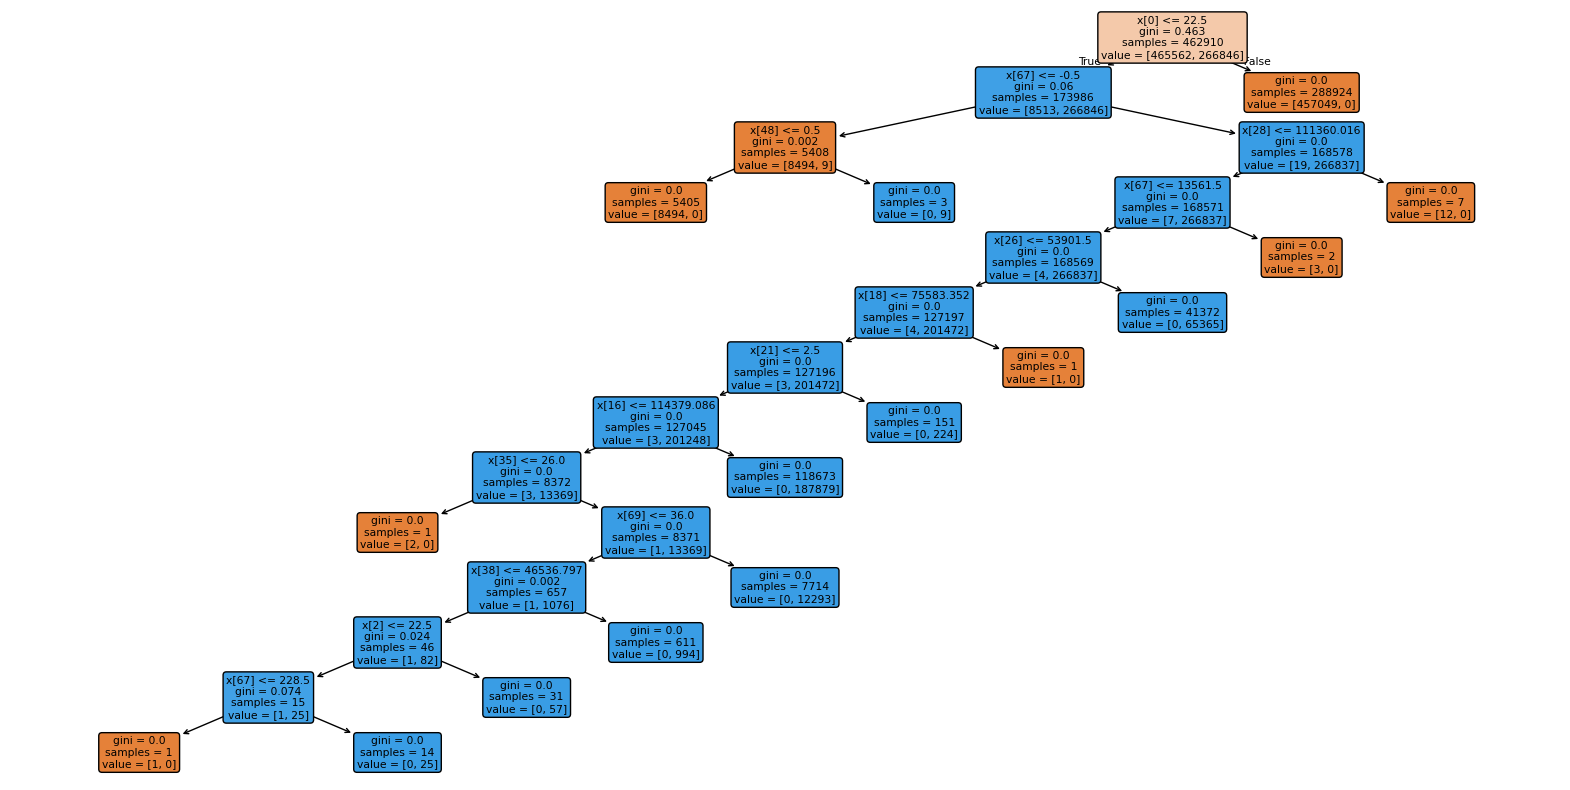

In [ ]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [ ]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


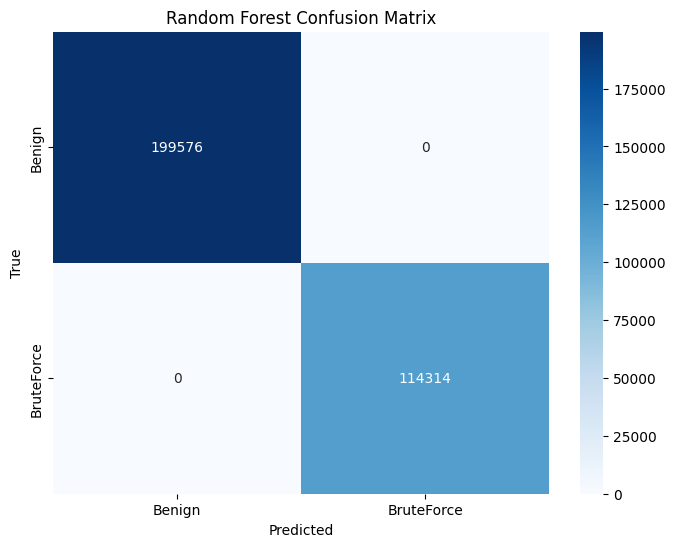

In [ ]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'BruteForce'], 'Random Forest Confusion Matrix')